Chp 7

In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
# Generate the network
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)

3

In [3]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [4]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [5]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

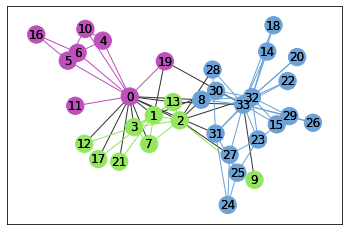

In [6]:
karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

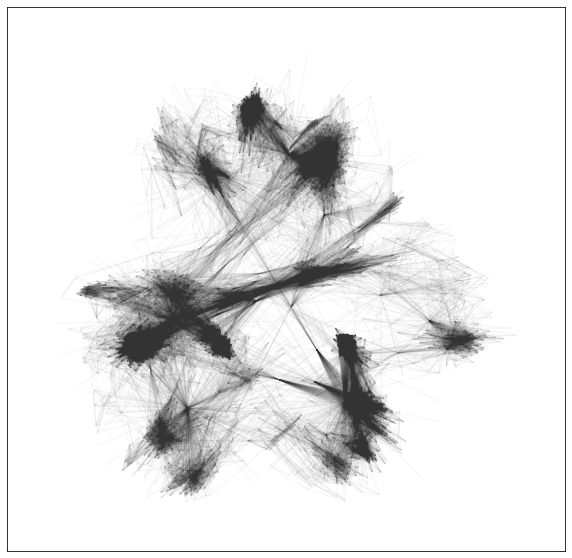

In [8]:
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt

# Specify the path to your text file
txt_file = "facebook_combined.txt"

# Create an empty graph
G_social = nx.Graph()

# Load data from the text file and add nodes and edges to the graph
with open(txt_file, "r") as file:
    for line in file:
        source, target = map(int, line.strip().split())
        G_social.add_edge(source, target)

# Calculate layout and draw the graph
pos = nx.spring_layout(G_social, k=0.1)
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)

# Show the graph
plt.show()


In [9]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

In [10]:
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

In [11]:
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = [get_color(G_social.edges[e]['community']) for e in internal]

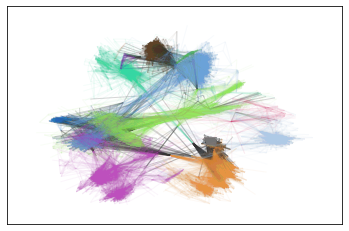

In [12]:
# Draw external edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)

girvan newman

In [13]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

In [14]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [15]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

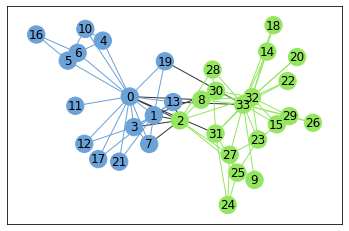

In [16]:
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

In [1]:
import itertools
result = nxcom.girvan_newman(G_karate)
communities = next(itertools.islice(result, 2, 4))

NameError: name 'nxcom' is not defined

In [18]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

In [19]:
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

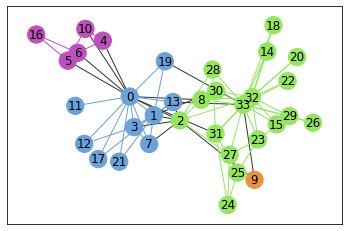

In [20]:
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

Clique

In [21]:
cliques = list(nx.find_cliques(G_karate))
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [22]:
# Find maximum clique
max_clique = max(cliques, key=len)
max_clique

[0, 1, 2, 3, 13]

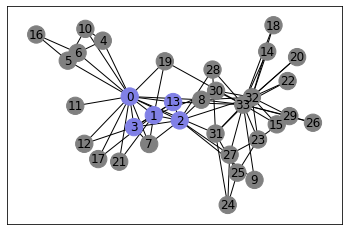

In [23]:
# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

k core

In [24]:
# Find k-cores
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

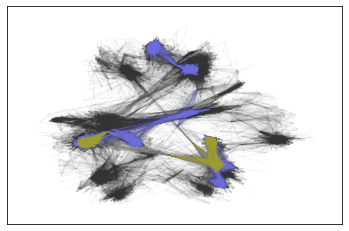

In [25]:
# Visualize network and k-cores
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0, edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0, edge_color="#AFAF33", alpha=0.05, with_labels=False)

Chp 8

In [26]:
G = nx.karate_club_graph()
# Annotate with splinter club label
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]
nx.set_node_attributes(G, dict(enumerate(member_club)), 'club')
# Find internal and external edges
internal = [(v, w) for v, w in G.edges if G.nodes[v]['club'] == G.nodes[w]['club']]
external = [(v, w) for v, w in G.edges if G.nodes[v]['club'] != G.nodes[w]['club']]
# Update edge attributes
nx.set_edge_attributes(G, dict((e, 'internal') for e in internal), 'internal')
nx.set_edge_attributes(G, dict((e, 'external') for e in external), 'internal')

In [27]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

strength = dict(
    ((v,w), tie_strength(G, v, w))
    for v, w in G.edges())

In [28]:
def bridge_span(G):
    # Get list of edges
    edges = G.edges()
    # Copy G
    G = nx.Graph(G)
    # Create result dict
    result = dict()
    for v, w in edges:
        # Temporarily remove edge
        G.remove_edge(v, w)
        # Find distance with edge removed
        try:
            d = nx.shortest_path_length(G, v, w)
            result[(v, w)] = d
        except nx.NetworkXNoPath:
            result[(v, w)] = float('inf')
        # Restore edge
        G.add_edge(v, w)
    return result

span = bridge_span(G)

In [29]:
# Order edges by tie strength
ordered_edges = sorted(strength.items(), key=lambda x: x[1])
print('Edge\t  Strength\tSpan\tInternal')
# Print 10 strongest
for e, edge_strength in ordered_edges[:10]:
    print('{:10}{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e]['internal']
    ))
print('...')
# Print 10 weakest
for e, edge_strength in ordered_edges[-10:]:
    print('{:10}{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e]['internal']
    ))

Edge	  Strength	Span	Internal
(0, 11)   1		inf	internal
(0, 31)   1		3	external
(1, 30)   1		3	external
(2, 9)    1		3	external
(2, 27)   1		3	external
(2, 28)   1		3	external
(9, 33)   1		3	internal
(13, 33)  1		3	external
(19, 33)  1		3	external
(23, 25)  1		3	internal
...
(8, 32)   4		2	internal
(23, 33)  4		2	internal
(29, 33)  4		2	internal
(1, 2)    5		2	internal
(1, 3)    5		2	internal
(2, 3)    5		2	internal
(0, 2)    6		2	internal
(0, 3)    6		2	internal
(0, 1)    8		2	internal
(32, 33)  11		2	internal


small world 

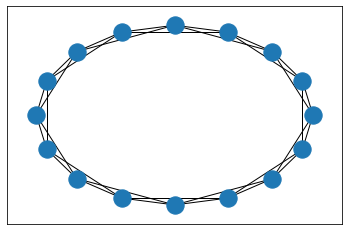

In [30]:
G_small_ring = nx.watts_strogatz_graph(16, 4, 0)
pos = nx.circular_layout(G_small_ring)
nx.draw_networkx(G_small_ring, pos=pos, with_labels=False)


In [31]:
G_ring = nx.watts_strogatz_graph(4000, 10, 0)

In [32]:
nx.average_shortest_path_length(G_ring)

200.45011252813202

In [33]:
nx.average_clustering(G_ring)

0.6666666666666546

In [34]:
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt

# Specify the path to your text file
txt_file = "facebook_combined.txt"

# Create an empty graph
G_social = nx.Graph()

# Load data from the text file and add nodes and edges to the graph
with open(txt_file, "r") as file:
    for line in file:
        source, target = map(int, line.strip().split())
        G_social.add_edge(source, target)
        
nx.average_shortest_path_length(G_social)

3.6925068496963913

In [35]:
nx.average_clustering(G_social)

0.6055467186200876

random networks

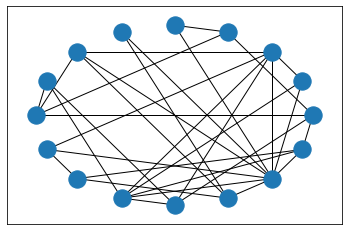

In [36]:
G_small_random = nx.watts_strogatz_graph(16, 4, 1)
pos = nx.circular_layout(G_small_random)
nx.draw_networkx(G_small_random, pos=pos, with_labels=False)

In [37]:
G_random = nx.watts_strogatz_graph(4000, 10, 1)

In [38]:
nx.average_shortest_path_length(G_random)

3.867266941735434

In [39]:
nx.average_clustering(G_random)

0.0022935843782980027

waltz strogatz

In [40]:
path = []
clustering = []
# Try a range of rewiring probabilities
p = [10**(x) for x in range(-6, 1)]
for p_i in p:
    path_i = []
    clustering_i =[]
    # Create 10 models for each probability
    for n in range(10):
        G = nx.watts_strogatz_graph(1000, 10, p_i)
        path_i.append(nx.average_shortest_path_length(G))
        clustering_i.append(nx.average_clustering(G))
    # Average the properties for each p_i
    path.append(sum(path_i) / len(path_i))
    clustering.append(sum(clustering_i) / len(clustering_i))

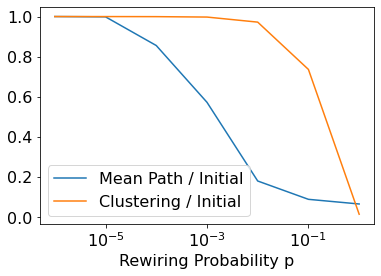

In [41]:
# Plot the results
fig, ax = plt.subplots()
for spine in ax.spines.values():
    spine.set_visible(True)
plt.semilogx(p, [x / path[0] for x in path], label='Mean Path / Initial')
plt.semilogx(p, [x / clustering[0] for x in clustering], label='Clustering / Initial')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Rewiring Probability p', fontsize=16)
plt.legend(fontsize=16)

Contagion

In [42]:
def propagate_simple(G):
    to_infect = set([])
    # Find infected nodes
    for v in G.nodes():
        if G.nodes[v]['infected'] == False:
            # Mark all neighbors for infection
            for w in nx.neighbors(G, v):
                if G.nodes[w]['infected']:
                    to_infect.add(v)
                    break
    # Infect marked nodes
    for v in to_infect:
        G.nodes[v]['infected'] = True

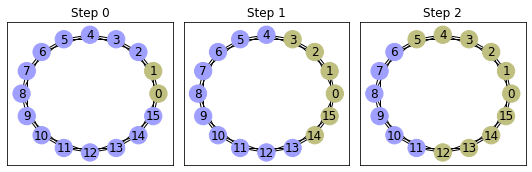

In [43]:
# Infect two nodes
nx.set_node_attributes(
    G_small_ring,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_ring.nodes[i]['infected'] = True

# Visualize first three time steps
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    # Visualize
    plt.subplot(1, 3, i + 1)
    node_color = [
        '#bfbf7f' if G_small_ring.nodes[v]['infected'] else '#9f9fff'
        for v in G_small_ring.nodes]
    nx.draw_networkx(
        G_small_ring,
        pos=nx.circular_layout(G_small_ring),
        node_color=node_color)
    # Propagate the contagion
    propagate_simple(G_small_ring)
    plt.title("Step {}".format(i))
plt.tight_layout()

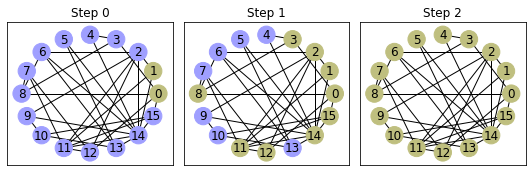

In [44]:
# Infect two nodes
nx.set_node_attributes(
    G_small_random,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_random.nodes[i]['infected'] = True

# Visualize first three time steps
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    # Visualize
    plt.subplot(1, 3, i + 1)
    node_color = [
        '#bfbf7f' if G_small_random.nodes[v]['infected'] else '#9f9fff'
        for v in G_small_random.nodes]
    nx.draw_networkx(
        G_small_random,
        pos=nx.circular_layout(G_small_random),
        node_color=node_color)
    # Propagate the contagion
    propagate_simple(G_small_random)
    plt.title("Step {}".format(i))
plt.tight_layout()

In [45]:
def propagate_complex(G):
    to_infect = set([])
    # Find uninfected nodes
    for v in G.nodes():
        if G.nodes[v]['infected'] == False:
            infected_neighbors = 0
            # Count infected neighbors
            for w in nx.neighbors(G, v):
                if G.nodes[w]['infected']:
                    infected_neighbors += 1
            # Remember nodes with 2+ infected neighbors
            if infected_neighbors >= 2:
                to_infect.add(v)
    # Infect new nodes
    for v in to_infect:
        G.nodes[v]['infected'] = True

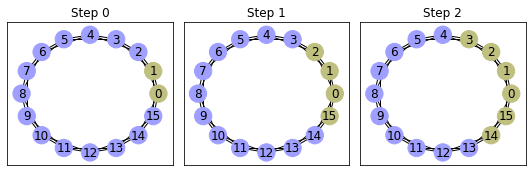

In [46]:
# Infect two nodes
nx.set_node_attributes(
    G_small_ring,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_ring.nodes[i]['infected'] = True

# Visualize first three time steps
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    # Visualize
    plt.subplot(1, 3, i + 1)
    node_color = [
        '#bfbf7f' if G_small_ring.nodes[v]['infected'] else '#9f9fff'
        for v in G_small_ring.nodes]
    nx.draw_networkx(
        G_small_ring,
        pos=nx.circular_layout(G_small_ring),
        node_color=node_color)
    # Propagate the contagion
    propagate_complex(G_small_ring)
    plt.title("Step {}".format(i))
plt.tight_layout()

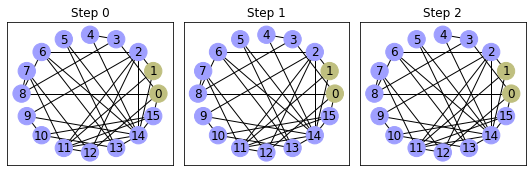

In [47]:
# Infect two nodes
nx.set_node_attributes(
    G_small_random,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_random.nodes[i]['infected'] = True

# Visualize first three time steps
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    # Visualize
    plt.subplot(1, 3, i + 1)
    node_color = [
        '#bfbf7f' if G_small_random.nodes[v]['infected'] else '#9f9fff'
        for v in G_small_random.nodes]
    nx.draw_networkx(
        G_small_random,
        pos=nx.circular_layout(G_small_random),
        node_color=node_color)
    # Propagate the contagion
    propagate_complex(G_small_random)
    plt.title("Step {}".format(i))
plt.tight_layout()

chp 9

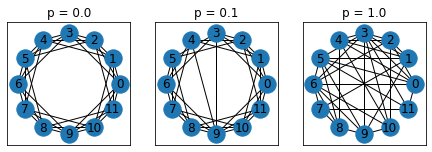

In [48]:
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

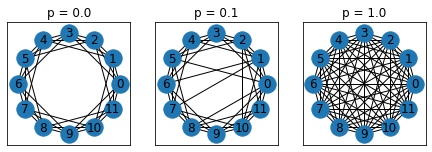

In [50]:
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.newman_watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

Preferential attachment

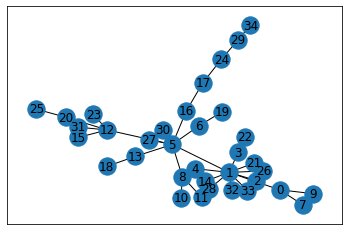

In [51]:
 G_preferential_35 = nx.barabasi_albert_graph(35, 1)
pos = nx.spring_layout(G_preferential_35, k=0.1)
nx.draw_networkx(G_preferential_35, pos)

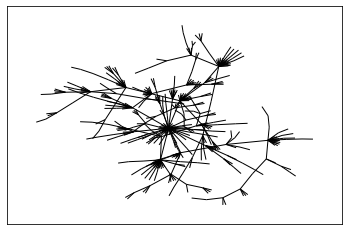

In [52]:
G_preferential_500 = nx.barabasi_albert_graph(500, 1)
pos = nx.spring_layout(G_preferential_500)
nx.draw_networkx(G_preferential_500, pos, node_size=0, with_labels=False)

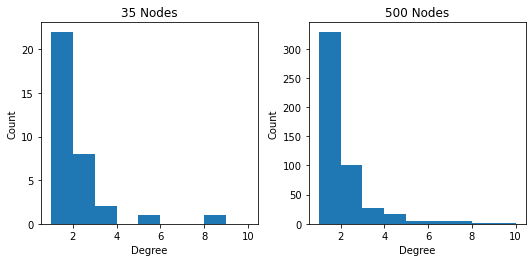

In [53]:
def plot_degree_hist(G, title):
    """Plot histogram of node degrees."""
    plt.hist(dict(nx.degree(G)).values(), bins=range(1, 11))
    # Label axes
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(title)
    
plt.figure(figsize=(7.5, 3.75))
ax = plt.subplot(1,2,1)
plot_degree_hist(G_preferential_35, '35 Nodes')
for spine in ax.spines.values():
    spine.set_visible(True)
ax = plt.subplot(1,2,2)
for spine in ax.spines.values():
    spine.set_visible(True)
plot_degree_hist(G_preferential_500, '500 Nodes')
plt.tight_layout()

configuration model

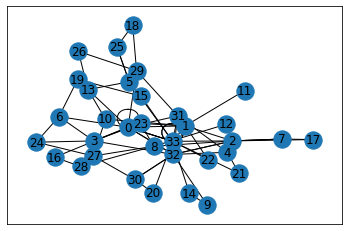

In [54]:
# Find degrees of karate club nodes
G_karate = nx.karate_club_graph()
degree_sequence = dict(nx.degree(G_karate)).values()
# Generate a random network with the same node degrees
G_configuration = nx.degree_seq.configuration_model(degree_sequence)
nx.draw_networkx(G_configuration)

agent based

In [56]:
import random
from numpy import random as nprand

def initial_beliefs(G, true_value=0, std=15):
    """Generate estimates of a true value with normally-distributed errors."""
    beliefs = dict(
        (v, random.gauss(true_value, std))
        for v in G.nodes())
    return beliefs
beliefs = initial_beliefs(G_karate, true_value=42)

In [57]:
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors' beliefs'''
    new_beliefs = dict()
    for v in G.nodes():
        # Include old belief in average
        total = beliefs[v]
        count = 1
        # Update average based on each neighbor
        for w in G.neighbors(v):
            total += beliefs[w]
            count += 1
        # Calculate average for node w
        new_beliefs[v] = total / count
    return new_beliefs

In [58]:
def plot_beliefs(G, initial_beliefs, true_value=0, steps=10):
    """Plot change in beliefs over time."""
    current_beliefs = dict(initial_beliefs)
    beliefs = [current_beliefs]
    # Create dicts of x and y values for each node
    x = dict((v, list()) for v in G.nodes())
    y = dict((v, list()) for v in G.nodes())
    # Repeatedly update beliefs
    for i in range(steps + 1):
        for v in G.nodes():
            x[v].append(i)
            y[v].append(current_beliefs[v])
        if i < steps:
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs)
    # Plot evolution of each node's beliefs
    for v in G.nodes():
        plt.plot(x[v], y[v], 'b-', alpha=0.3, linewidth=2)
    # Plot mean value
    mean_value = sum(initial_beliefs.values()) / len(initial_beliefs)
    plt.plot([0, steps], [mean_value, mean_value], 'k:')
    # Add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    plt.xlim([0, steps])
    plt.ylim([22, 62])

In [59]:
networks = {
    'Karate Club': G_karate,
    'Configuration Model': G_configuration,
    'Preferential Attachment': nx.barabasi_albert_graph(34, 1),
    'Ring': nx.watts_strogatz_graph(34, 6, 0),
    'Watts-Strogatz (p=0.3)': nx.watts_strogatz_graph(34, 6, 0.1),
    'Watts-Strogatz (p=1)': nx.watts_strogatz_graph(34, 6, 1)}

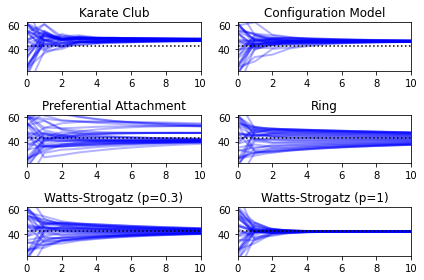

In [60]:
for i, (title, G) in enumerate(networks.items()):
    plt.subplot(3, 2, i + 1)
    plt.title(title)
    plot_beliefs(G, beliefs, 42)
plt.tight_layout()